<h1 style="text-align:center;">TF2202 Komputasi Rekayasa - Persamaan Diferensial Parsial</h1>
<h2 style="text-align:center;">Persamaan Gelombang</h2>
<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [4]:
import matplotlib
matplotlib.style.use("default")

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [6]:
import matplotlib.animation as animation

In [7]:
import IPython.display

### Fungsi untuk animasi 2d (silakan modifikasi sesuai kebutuhan)

In [8]:
def create_anim_2d(y, x, t, ymin, ymax):
    plt.clf()
    fig, ax = plt.subplots()
    plt.ylim(ymin, ymax)
    k = 0
    line, = ax.plot(x, y[:,k])

    time_template = "t = %.5f"
    time_text = ax.text(0.8, 0.9, "", transform=ax.transAxes)

    def init():
        line.set_xdata(x)
        line.set_ydata(y[:,0])
        time_text.set_text(time_template % t[0])
        return line, time_text

    def animate(k):
        line.set_xdata(x)
        line.set_ydata(y[:,k])
        time_text.set_text(time_template % t[k])
        return line, time_text

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=len(t), blit=True,
                                   frames=len(t));
    return anim

### Fungsi untuk animasi 3d surface plot (silakan modifikasi sesuai kebutuhan)

In [9]:
def create_anim_surf3d(Z, X, Y, t, zmin, zmax):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    def gen_surf_data(k, Z, line):
        ax.clear()
        line = ax.plot_surface(X, Y, Z[:,:,k], linewidth=2, cmap="jet", antialiased=False)
        ax.set_zlim(zmin, zmax)
        ax.set_title("t="+format("%.4f"%t[k]))
        return line,
    
    line = ax.plot_surface(X, Y, Z[:,:,0], linewidth=2, cmap="jet", antialiased=False)
    ax.set_title("t="+format("%.4f"%t[0]))
    
    anim = animation.FuncAnimation(fig, gen_surf_data, fargs=(Z, line),
                                   interval=len(t), frames=len(t), blit=False)
    
    return anim

# Persamaan Gelombang 1d

## Intro

$$
c^2
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{\partial^2}{\partial t^2} u(x,t)
$$


$$
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{1}{c^2} \frac{\partial^2}{\partial t^2} u(x,t)
$$

## Metode eksplisit untuk persamaan gelombang 1d

Persamaan gelombang:

$$
c^2 \frac{\partial^2}{\partial x^2} u(x,t) = \frac{\partial^2}{\partial t^2} u(x,t)
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_{f}}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$
- $\left.\dfrac{\partial}{\partial t}u(x,t)\right|_{t=0} = u'_{0}(x)$

Gunakan centered difference untuk turuan kedua terhadap $x$ dan $t$:

$$
c^2 \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - 2u^{k}_{i} + u^{k-1}_{i}}{(\Delta t)^2}
$$

Dengan menggunakan definisi:

$$
r = c^2 \frac{(\Delta x)^2}{(\Delta t)^2}
$$

dapat dituliskan:

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + 
2(1 - r)u^{k}_{i} - u^{k-1}_{i}
$$

Untuk $k = 0$, kita memerlukan nilai untuk $u^{-1}_{i} = u(x_{i},-\Delta t)$:

$$
u^{1}_{i} = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - u^{-1}_{i}
$$

Dengan menggunakan aproksimasi centered diference untuk syarat awal:

$$
\frac{u^{1}_{i} - u^{-1}_{i}}{2\Delta t} = u'_{0}(x_{i})
$$

dapat diperoleh:

$$
u^{-1}_{i} = u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t
$$

Sehingga untuk $k = 0$, kita peroleh:

$$
\begin{align*}
u^{1}_{i} & = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - \left( u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t \right) \\
u^{1}_{i} & = \frac{1}{2} r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
(1 - r)u^{0}_{i} + u'_{0}(x_{i}) \Delta t
\end{align*}
$$

Kondisi untuk stabilitas:

$$
r = c^2 \frac{(\Delta t)^2}{(\Delta x)^2} \leq 1
$$

## Implementasi

In [10]:
def wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    r = c2*(dt/dx)**2
    
    if r > 1.0:
        print("WARNING: propagasi tidak stabil")
        print("r = %f > 1\n" % r)
    
    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k]  = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    for i in range(1,Nx):
        u[i,1] = 0.5*r*( u[i+1,0] + u[i-1,0] ) + (1.0 - r)*u[i,0] + dt*u0p( x[i] )
    
    for k in range(1,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + 2*(1 - r)*u[i,k] - u[i,k-1]
    
    return u, x, t

## Contoh 1

In [11]:
def u0(x):
    return x*(1.0 - x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 4.0
Nt = 400
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

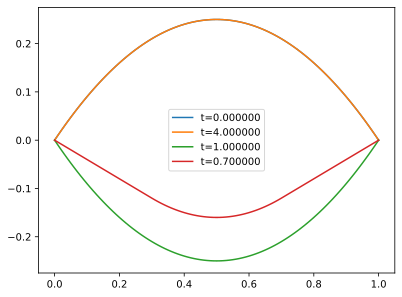

In [12]:
plt.clf()
for k in [0, -1, 100, 70]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend();

### Animasi

<Figure size 640x480 with 0 Axes>

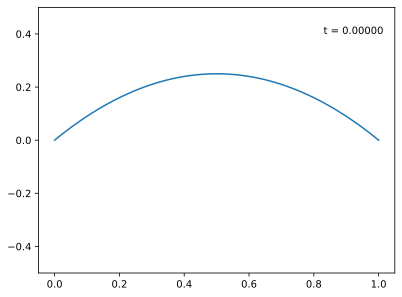

In [13]:
anim = create_anim_2d( u, x, t, -0.5, 0.5 );

In [14]:
IPython.display.HTML( anim.to_html5_video() )

## Contoh 2

In [14]:
def u0(x):
    return np.sin(5.0*np.pi*x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

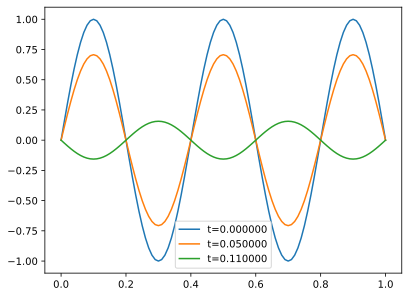

In [15]:
plt.clf()
for k in [0, 5, 11]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend();

<Figure size 640x480 with 0 Axes>

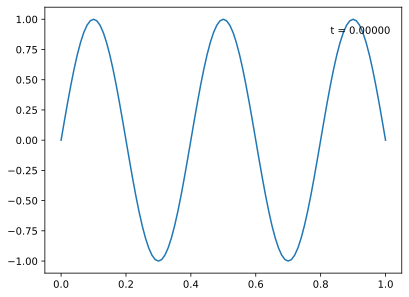

In [16]:
anim = create_anim_2d(u, x, t, -1.1, 1.1)

In [17]:
IPython.display.HTML(anim.to_html5_video())

## Contoh 3

In [18]:
def u0(x):
    return np.exp(-200*(x-0.5)**2)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

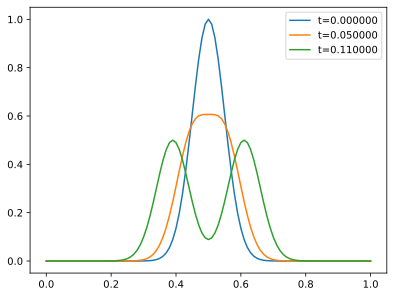

In [19]:
plt.clf()
for k in [0, 5, 11]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend();

<Figure size 640x480 with 0 Axes>

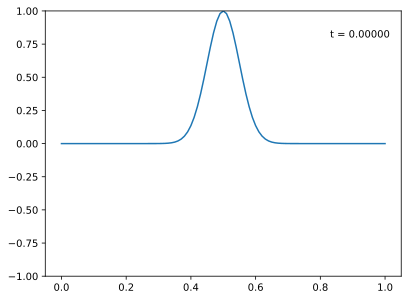

In [20]:
anim = create_anim_2d(u, x, t, -1.0, 1.0)

In [21]:
IPython.display.HTML(anim.to_html5_video())

# Persamaan Gelombang 2d

$$
c^2 \left( \frac{\partial^2 u(x,y,t)}{\partial x^2} + 
\frac{\partial^2 u(x,y,t)}{\partial y^2}
\right) = \frac{\partial^2 u(x,y,t)}{\partial t^2}
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq y \leq y_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas:
- $u(0,y,t) = b_{x_{0}}(y,t)$
- $u(x_{f},y,t) = b_{x_{f}}(y,t)$
- $u(x,0,t) = b_{y_{0}}(x,t)$
- $u(x,y_{f},t) = b_{y_{f}}(x,t)$

Syarat awal:
- $u(x,y,0) = u_{0}(x,y)$
- $\left| \dfrac{\partial u}{\partial t} \right|_{t=0} = u'_{0}(x,y)$

Gunakan central difference untuk turunan kedua:

$$
c^2 \left(
\frac{u^{k}_{i+1,j} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{\left(\Delta x\right)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{\left(\Delta y\right)^2} =
\frac{u^{k+1}_{i,j} - 2u^{k}_{i,j} + u^{k-1}_{i,j}}{\left(\Delta t\right)^2}
\right)
$$

Dapat diperoleh persamaan eksplisit berikut:

$$
u^{k+1}_{i,j} = r_{x} \left( u^{k}_{i,j+1} + u^{k}_{i,j-1} \right) +
r_{y} \left( u^{k}_{i+1,j} + u^{k}_{i-1,j} \right) + 2(1 - r_x - r_y ) u^{k}_{i,j} - u^{k-1}_{i,j}
$$

dengan: $r_{x} = c^2 \dfrac{(\Delta t)^2}{(\Delta x)^2}$ dan $r_{y} = c^2 \dfrac{(\Delta t)^2}{(\Delta y)^2}$.

Untuk kasus $k = 0$, kita memerlukan $u^{-1}_{i,j}$. Nilai ini dapat diaproksimasi dari:

$$
\frac{u^{1}_{i,j} - u^{-1}_{i,j}}{2\Delta t} = u'_{0}(x_{i},y_{j})
$$

sehingga diperoleh

$$
u^{1}_{i,j} = \frac{r_{x}}{2} \left( u^{0}_{i,j+1} + u^{0}_{i,j-1} \right) +
\frac{r_{y}}{2} \left( u^{0}_{i+1,j} + u^{0}_{i-1,j} \right) +
2(1 - r_x - r_y)u^{0}_{i,j} + u'_{0}(x_{i},y_{j})\Delta t
$$

Syarat untuk stabilitas adalah:

$$
r = \frac{4c^2 (\Delta t)^2}{(\Delta x)^2 + (\Delta y)^2} \leq 1
$$

## Implementasi

In [22]:
def wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt ):

    dx = xf/Nx
    x  = np.linspace(0.0, xf, Nx+1)
    
    dy = yf/Nx
    y  = np.linspace(0.0, yf, Ny+1) 
    
    dt = tf/Nt
    t  = np.linspace(0.0, tf, Nt+1)
    
    u  = np.zeros( (Nx+1,Ny+1,Nt+1) )
    
    for i in range(Nx+1):
        for j in range(Ny+1):
            u[i,j,0]  = u0( x[j], y[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        for j in range(Ny+1):
            u[0,j,k]  = bx0( y[j], t[k] ) 
            u[Nx,j,k] = bxf( y[j], t[k] )
    
    for k in range(Nt+1):
        for i in range(Ny+1):
            u[i,0,k]  = by0( x[i], t[k] ) 
            u[i,Ny,k] = byf( x[i], t[k] )
    
    rx = c2*dt**2/dx**2
    ry = c2*dt**2/dy**2
    
    r = 4*c2*dt**2/(dx**2 + dy**2)
    
    if r >= 1.0:
        print("WARNING: r >= 1, solusi tidak stabil")
        print("r = ", r)
    
    k = 0
    for i in range(1,Nx):
        for j in range(1,Ny):
            u[i,j,k+1] = 0.5*( rx*(u[i,j+1,k] + u[i,j-1,k]) + ry*(u[i-1,j,k] + u[i+1,j,k]) ) + \
                         2*(1 - rx - ry)*u[i,j,k] + dt*u0p( x[i], x[j] )

    for k in range(1,Nt):
        for i in range(1,Nx):
            for j in range(1,Ny):
                u[i,j,k+1] = rx*(u[i,j+1,k] + u[i,j-1,k]) + \
                             ry*(u[i-1,j,k] + u[i+1,j,k]) + \
                             2*(1 - rx - ry)*u[i,j,k] - u[i,j,k-1]
                        
    return u, x, y, t

## Contoh 1

In [23]:
def u0(x,y):
    return 0.1*np.sin(np.pi*x)*np.sin(np.pi*y/2)

def u0p(x,y):
    return 0.0

def bx0(y,t):
    return 0.0

def bxf(y,t):
    return 0.0

def by0(x,t):
    return 0.0

def byf(x,t):
    return 0.0

c2 = 0.25
xf = 2.0
yf = 2.0
tf = 4.0

Nx = 40
Ny = 40
Nt = 80

u, x, y, t = wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt )

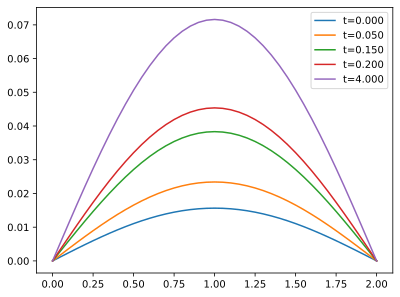

In [24]:
plt.clf()
for k in [0, 1, 3, 4, -1]:
    plt.plot( x, u[:,1,k], label="t="+format("%.3f"%t[k]) )
plt.legend();

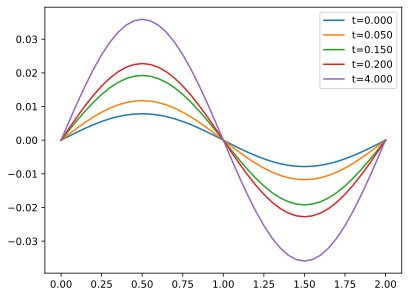

In [18]:
plt.clf()
for k in [0, 1, 3, 4, -1]:
    plt.plot( y, u[1,:,k], label="t="+format("%.3f"%t[k]) )
plt.legend();

<Figure size 640x480 with 0 Axes>

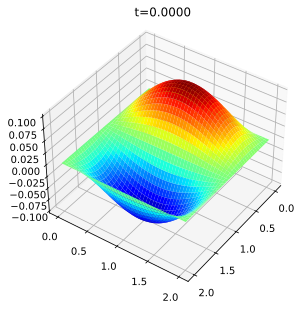

In [25]:
X, Y = np.meshgrid(x,y);
k = 0
plt.clf()
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="jet", antialiased=False)
ax.set_title("t="+format("%.4f"%t[k]))
ax.view_init(elev=40., azim=35)

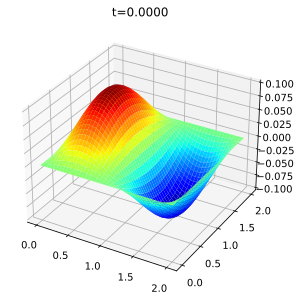

In [20]:
anim = create_anim_surf3d(u, X, Y, t, -0.5, 0.5)

In [21]:
IPython.display.HTML(anim.to_html5_video())

## Contoh 2

In [ ]:
def u0(x,y):
    return np.exp(-30*( (x-1.0)**2 + (y-1.0)**2 ))

def u0p(x,y):
    return 0.0

def bx0(y,t):
    return 0.0

def bxf(y,t):
    return 0.0

def by0(x,t):
    return 0.0

def byf(x,t):
    return 0.0

c2 = 0.25
xf = 2.0
yf = 2.0
tf = 16.0

Nx = 50
Ny = 50
Nt = 320

u, x, y, t = wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt )

In [ ]:
X, Y = np.meshgrid(x,y)
k = 0
plt.clf()
fig = plt.figure();
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="jet", antialiased=False)
ax.set_title("t="+format("%.4f"%t[k]))
ax.view_init(elev=10., azim=20)

In [ ]:
anim = create_anim_surf3d(u, X, Y, t, -1.0, 1.0)

In [ ]:
IPython.display.HTML(anim.to_html5_video())

## Travelling wave

In [ ]:
def travel_wave(A, k, omega, x, t):
    return A*np.cos(omega*t - k*x)

In [ ]:
x0 = 0.0
xf = 2.0
x = np.linspace(x0, xf, 500)
A = 1.0
λ = 1.0
k = -2*np.pi/λ
T = 1.0
omega = 2*np.pi/T

t0 = 0.0
Nt = 200
delta_t = 0.01
for i in range(Nt):
    plt.clf()
    t = t0 + i*delta_t
    plt.plot(x, travel_wave(A, k, omega, x, t), label="t="+format("%.2f" % t))
    plt.ylim(-1.0, 1.0)
    plt.legend(loc="upper right")
    filename = "IMG_{:04d}.png".format(i)
    plt.savefig(filename)